Dataset scaricato da https://www.kaggle.com/datasets/samuelcortinhas/muffin-vs-chihuahua-image-classification?resource=download

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

In [3]:
train = pd.DataFrame(columns=['label', 'path'])
test = pd.DataFrame(columns=['label', 'path'])

In [7]:
for dirname, _, filenames in os.walk('archive'):
    for filename in filenames:
        paths = dirname.split('\\')
        batch = paths[-2]
        label = paths[-1]
        file_path = os.path.join(dirname, filename)

        dic = {'label': label, 'path': file_path}
        if batch == 'test':
            
            test.loc[len(test)] = dic
        elif batch == 'train':

            train.loc[len(train)] = dic

In [8]:
test.sample(5)

,label,path
338,chihuahua,archive\test\chihuahua\img_2_269.jpg
1053,muffin,archive\test\muffin\img_3_879.jpg
994,muffin,archive\test\muffin\img_3_135.jpg
31,chihuahua,archive\test\chihuahua\img_0_17.jpg
853,muffin,archive\test\muffin\img_2_1115.jpg


In [9]:
train.sample(5)

,label,path
3451,muffin,archive\train\muffin\img_2_186.jpg
1558,chihuahua,archive\train\chihuahua\img_2_898.jpg
4343,muffin,archive\train\muffin\img_4_131.jpg
273,chihuahua,archive\train\chihuahua\img_0_432.jpg
1166,chihuahua,archive\train\chihuahua\img_2_115.jpg


In [51]:
train.shape

(4733, 2)

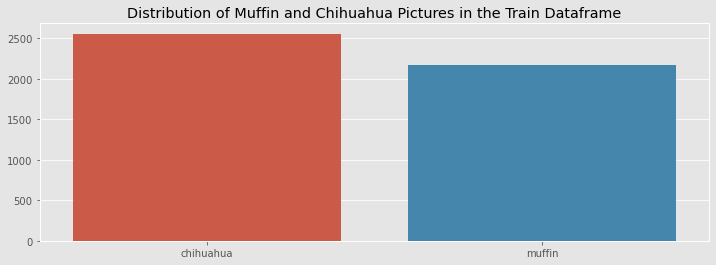

In [10]:
plt.figure(figsize=(12,4), facecolor="#e5e5e5")
sns.countplot(data=train, x='label')
plt.ylabel(None)
plt.xlabel(None)
plt.title("Distribution of Muffin and Chihuahua Pictures in the Train Dataframe");

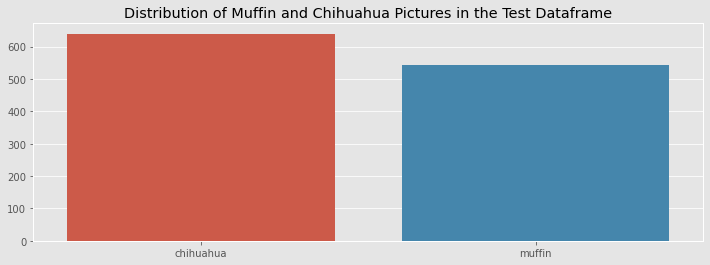

In [11]:
plt.figure(figsize=(12,4), facecolor="#e5e5e5")
sns.countplot(data=test, x='label')
plt.ylabel(None)
plt.xlabel(None)
plt.title("Distribution of Muffin and Chihuahua Pictures in the Test Dataframe");

In [22]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

def show_image(index):
    plt.figure(figsize=(10,6))
    plt.grid(False)
    plt.axis('off')
    plt.imshow(load_img(train.iloc[index].path, target_size=(224,224)))

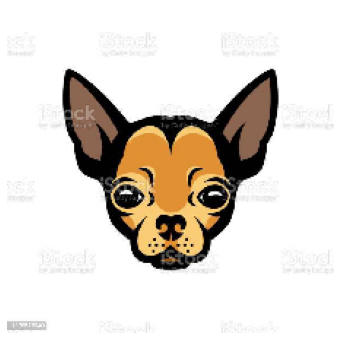

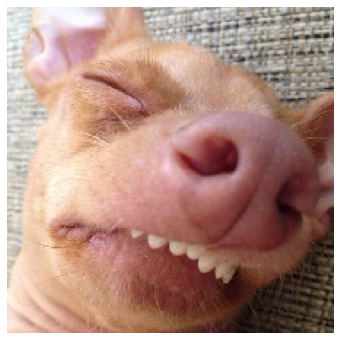

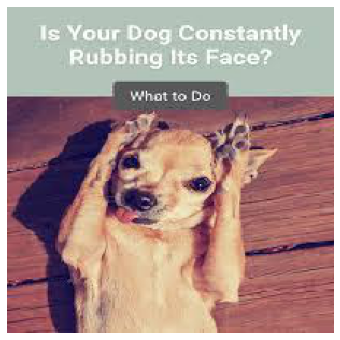

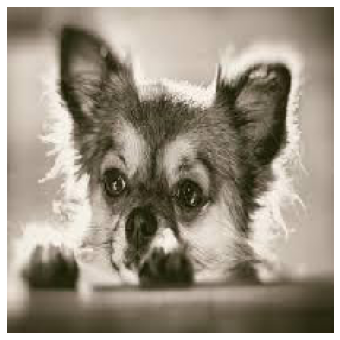

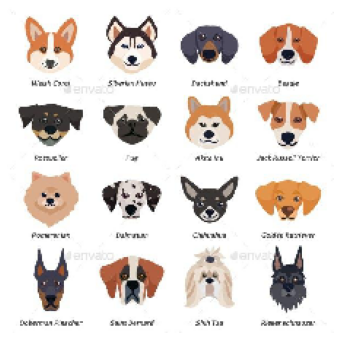

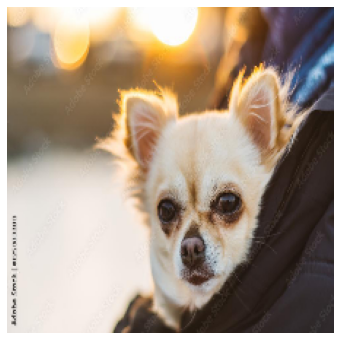

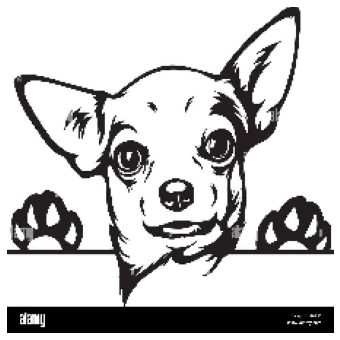

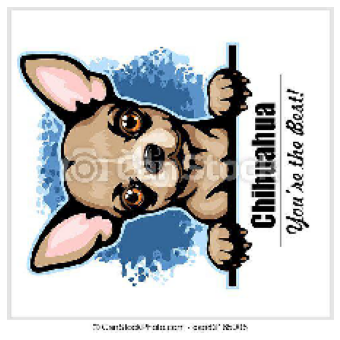

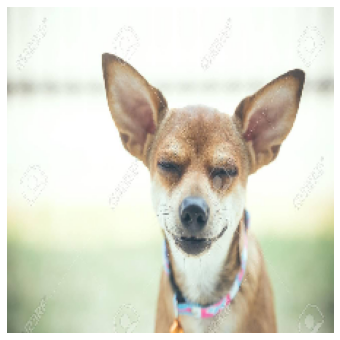

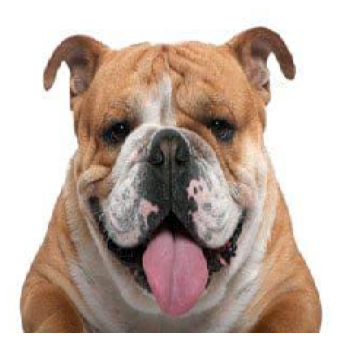

In [100]:
for i in range(0, 10):
    show_image(i)

# Pre shit

In [46]:
import cv2
import numpy as np
from PIL import Image

In [83]:
def preprocess_image(path):
    img = Image.open(path)  # Load the image using PIL
    img = img.convert('RGB')  # Convert image to RGB if necessary
    img = img.resize((64, 64))  # Resize the image to a desired size (e.g., 224x224)
    img = np.array(img)  # Convert PIL image to a numpy array
    img = img / 255.0  # Normalize pixel values between 0 and 1
    return np.array(img)

In [84]:
baby_train = train.head(150)

In [85]:
baby_train['image'] = baby_train['path'].apply(preprocess_image)

<ipython-input-85-d67314f70f2c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  baby_train['image'] = baby_train['path'].apply(preprocess_image)


Test di cosa abbiamo ottenuto

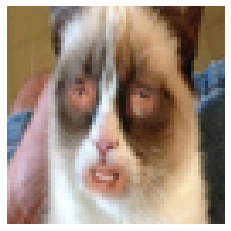

In [86]:
img = baby_train['image'].iloc[20]

plt.imshow(img)
plt.axis('off')
plt.show()

In [89]:
baby_train['image']

0      [[[1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 1.0,...
1      [[[0.9098039215686274, 0.9254901960784314, 0.9...
2      [[[0.7019607843137254, 0.7647058823529411, 0.7...
3      [[[0.47843137254901963, 0.42745098039215684, 0...
4      [[[0.996078431372549, 0.996078431372549, 0.996...
                             ...                        
145    [[[1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 1.0,...
146    [[[0.6980392156862745, 0.7215686274509804, 0.7...
147    [[[0.9098039215686274, 0.9098039215686274, 0.9...
148    [[[1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 1.0,...
149    [[[0.807843137254902, 0.8, 0.8196078431372549]...
Name: image, Length: 150, dtype: object

In [94]:
def flatten_image(image):
    return np.array(image.flatten())

In [95]:
baby_train['flat_image'] = baby_train['image'].apply(flatten_image)

<ipython-input-95-d532283cc5af>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  baby_train['flat_image'] = baby_train['image'].apply(flatten_image)


In [97]:
baby_train['flat_image'].shape

(150,)

# KERAS

In [26]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [27]:
inputs = keras.Input(shape=(784,))

In [30]:
inputs.shape

TensorShape([None, 784])

In [31]:
inputs.dtype

tf.float32

In [32]:
dense = layers.Dense(64, activation="relu")
x = dense(inputs)

In [33]:
x = layers.Dense(64, activation="relu")(x)
outputs = layers.Dense(10)(x)

In [34]:
model = keras.Model(inputs=inputs, outputs=outputs, name="mnist_model")

In [35]:
model.summary()

Model: "mnist_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


In [40]:
keras.utils.plot_model(model, "my_first_model.png")

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [90]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [91]:
x_train.shape

(60000, 28, 28)

In [98]:
x_train = x_train.reshape(60000, 784).astype("float32") / 255
x_test = x_test.reshape(10000, 784).astype("float32") / 255

model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=keras.optimizers.RMSprop(),
    metrics=[keras.metrics.SparseCategoricalAccuracy()],
)

history = model.fit(x_train, y_train, batch_size=64, epochs=2, validation_split=0.2)

test_scores = model.evaluate(x_test, y_test, verbose=2)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type numpy.ndarray).